# Data Analysis and Preparation for CF Book Recommender System 

### About the dataset
- Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.
- Oraganized into three CSV files, BX-Book-Ratings.csv, BX-Users.csv, BX_Books.csv
- Downloadable at https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset?resource=download-directory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_7511/266845322.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# create file paths for each CSV file
file_path_Ratings = 'Book reviews/BX-Book-Ratings.csv'

# Load the CSV file into  DataFrames and handle errors
df_Ratings = pd.read_csv(file_path_Ratings, encoding='windows-1252', sep=';', on_bad_lines="skip")

# Display the first 5 rows of the DataFrames
df_Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
file_path_Books = 'Book reviews/BX_Books.csv'
df_Books = pd.read_csv(file_path_Books, encoding='windows-1252',sep=';', on_bad_lines="skip")
df_Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
file_path_Users = 'Book reviews/BX-Users.csv'
df_Users = pd.read_csv(file_path_Users,  encoding='windows-1252',sep=';', on_bad_lines="skip")
df_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Some Data Analysis:

In [10]:
# counting non-zero ratings
df_Ratings_no_zeros = df_Ratings.copy()
# Replace 0 values with NaN in the 'Book-Rating' column
df_Ratings_no_zeros['Book-Rating'] = df_Ratings_no_zeros['Book-Rating'].replace(0, np.nan)
# Drop rows with NaN values (which were 0 before)
df_Ratings_no_zeros = df_Ratings_no_zeros.dropna(subset=['Book-Rating'])

ratings_count = len(df_Ratings_no_zeros)
book_count = df_Ratings['ISBN'].nunique()
user_count = df_Ratings['User-ID'].nunique()

print(f"Number of ratings: {ratings_count}")
print(f"Number of unique books: {book_count}")
print(f"Number of unique users: {user_count}")
print(f"Average number of ratings per user: {round(ratings_count/user_count, 2)}")
print(f"Average number of ratings per book: {round(ratings_count/book_count, 2)}")

Number of ratings: 433671
Number of unique books: 340556
Number of unique users: 105283
Average number of ratings per user: 4.12
Average number of ratings per book: 1.27


In [11]:
# calculate mean ratings
print(f"Mean global rating: {round(df_Ratings_no_zeros['Book-Rating'].mean(),2)}")

user_mean_ratings = df_Ratings_no_zeros.groupby('User-ID')['Book-Rating'].mean()
book_mean_ratings = df_Ratings_no_zeros.groupby('ISBN')['Book-Rating'].mean()

print(f"Mean rating per user: {round(user_mean_ratings.mean(),2)}")
print(f"Mean rating per book: {round(book_mean_ratings.mean(),2)}")

Mean global rating: 7.6
Mean rating per user: 7.46
Mean rating per book: 7.49


/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_7511/1091077376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=df_Ratings, palette="rocket")


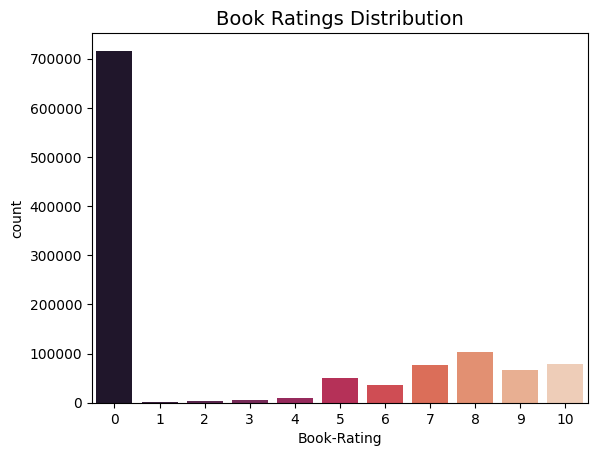

In [12]:
# plotting Book Ratings Distribution
sns.countplot(x="Book-Rating", data=df_Ratings, palette="rocket")
plt.title("Book Ratings Distribution", fontsize=14)
plt.show()

/var/folders/by/v7dmyyw51513bjzxg4zzg4_w0000gn/T/ipykernel_7511/3297451585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=df_Ratings_no_zeros, palette="rocket")


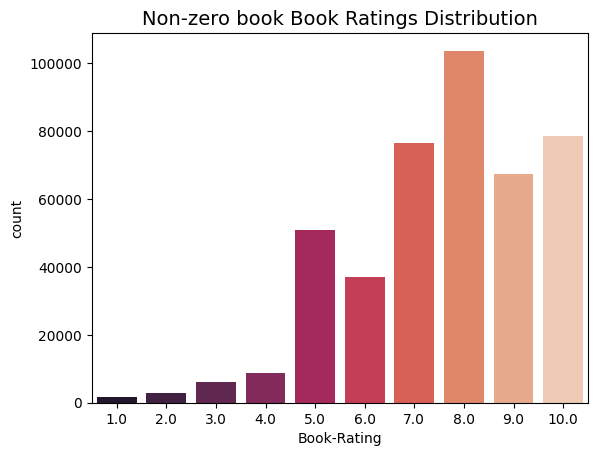

In [13]:
# plotting Non-zero Book Ratings Distribution
sns.countplot(x="Book-Rating", data=df_Ratings_no_zeros, palette="rocket")
plt.title("Non-zero book Book Ratings Distribution", fontsize=14)
plt.show()

In [14]:
def utility_matrix(df):
    """
    creates a sparse utility matrix from BX-Book-Ratings dataframe

    Args:
        df: pandas ratings dataframe containing 3 columns (User-ID, ISBN, Book-Rating)

    Returns:
        UMX: sparse matrix
        book_to_index: book to index mapper 
        user_to_index: user to index mapper 
        index_to_book: index to book mapper 
        index_to_user: index to user mapper
    """
    I = df['ISBN'].nunique() # count unique number of books
    J = df['User-ID'].nunique() # count unique number of users

    # MAPPERS
    # map each unique ISBN to a unique index
    book_to_index = dict(zip(np.unique(df["ISBN"]), list(range(I))))

    # map each unique User-ID to a unique index
    user_to_index = dict(zip(np.unique(df["User-ID"]), list(range(J))))

    
    # INVERSE MAPPERS
    # map each book index back to its ISBN
    index_to_book = dict(zip(list(range(I)), np.unique(df["ISBN"])))
    
    # map each user index back to its ID
    index_to_user = dict(zip(list(range(J)), np.unique(df["User-ID"])))

    # prepare the data to be placed in the sparse matrix
    book_index = [book_to_index[i] for i in df['ISBN']]
    user_index = [user_to_index[i] for i in df['User-ID']]

    # buil the sparse utility matrix
    UMX = csr_matrix((df["Book-Rating"], (book_index,user_index)), shape=(I,J))

    return UMX, book_to_index, user_to_index, index_to_book, index_to_user


In [15]:
UMX, book_to_index, user_to_index, index_to_book, index_to_user = utility_matrix(df_Ratings)

# sparsity of the matrix = # of non-zero elements / matrix size
print(f"Sparsity: {round(UMX.nnz / (UMX.shape[0]*UMX.shape[1]) *100,4)}%")

Sparsity: 0.0032%


# ALS

## Data preparation

In [16]:
from pyspark.sql import SparkSession, Row
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

In [17]:
filename = 'Book reviews/BX-Book-Ratings.csv'
seed = 12345

# Initialize Spark session
spark = SparkSession.builder.appName("ALSRecommender").getOrCreate()

# Load data from a CSV file, considering semicolon delimiter and quotes
data = spark.read.csv(filename, header=True, inferSchema=True, sep=';', quote='"')

# Select and rename the columns according to the CSV file's format
ratings = data.select(
    col('User-ID').cast('int').alias('userId'), 
    col('ISBN').alias('bookId'), 
    col('Book-Rating').cast('int').alias('rating')
)


# Transform the ISBN string to an index using StringIndexer
stringIndexer = StringIndexer(inputCol="bookId", outputCol="bookIdIndexed")
model = stringIndexer.fit(ratings)
ratingsIndexed = model.transform(ratings)

# Split data into training and test sets
(training, test) = ratingsIndexed.randomSplit([0.8, 0.2], seed=seed)

24/03/26 22:41:54 WARN Utils: Your hostname, Anhs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.215 instead (on interface en0)
24/03/26 22:41:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/26 22:41:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/03/26 22:41:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


24/03/26 22:42:10 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


## Modeling

In [18]:
als = ALS(userCol='userId', itemCol='bookIdIndexed', ratingCol='rating',
          coldStartStrategy='drop', nonnegative=True)


param_grid = ParamGridBuilder()\
             .addGrid(als.rank, [1, 20, 30])\
             .addGrid(als.maxIter, [20])\
             .addGrid(als.regParam, [.05, .15])\
             .build()
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')

cv = CrossValidator(
        estimator=als,
        estimatorParamMaps=param_grid,
        evaluator=evaluator,
        numFolds=3)

model = cv.fit(training)

best_model = model.bestModel
print('rank: ', best_model.rank)
print('MaxIter: ', best_model._java_obj.parent().getMaxIter())
print('RegParam: ', best_model._java_obj.parent().getRegParam())

24/03/26 22:42:32 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/03/26 22:42:33 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/03/26 22:42:34 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:34 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:35 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:36 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:37 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:38 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:42:38 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/03/26 22:42:38 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/03/26 22:42:38 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB


rank:  30
MaxIter:  20
RegParam:  0.15


In [19]:
predictions = best_model.transform(test)

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
ALSrmse = evaluator.evaluate(predictions)
print(f'Root Mean Squared Error (RMSE): {ALSrmse}')

24/03/26 22:51:57 WARN DAGScheduler: Broadcasting large task binary with size 10.1 MiB
24/03/26 22:51:58 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:51:58 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:51:59 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
24/03/26 22:52:00 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB
24/03/26 22:52:01 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB


Root Mean Squared Error (RMSE): 3.8780513466313353


# User-User collaborative filtering

In [20]:
from pyspark.sql import SparkSession, Row
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

### data preparation

In [21]:
#NOT USED

# Initialize Spark session
spark = SparkSession.builder.appName("ALSRecommender").getOrCreate()

# Load data from a CSV file, considering semicolon delimiter and quotes
data = spark.read.csv("Book reviews/BX-Book-Ratings.csv", header=True, inferSchema=True, sep=';', quote='"')

# Select and rename the columns according to the CSV file's format
ratings = data.select(
    col('User-ID').cast('int').alias('userId'), 
    col('ISBN').alias('bookId'), 
    col('Book-Rating').cast('int').alias('rating')
)


# Transform the ISBN string to an index using StringIndexer
stringIndexer = StringIndexer(inputCol="bookId", outputCol="bookIdIndexed")
model = stringIndexer.fit(ratings)
ratingsIndexed = model.transform(ratings)

# filter out users with less than 3 ratings
userRatingTreshold = 3
ratingsFiltered = ratingsIndexed.groupBy("userId").count().filter(col("count") > userRatingTreshold)
ratingsFiltered = ratingsFiltered.select("userId")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "userId", "inner")

#filter top 10% of books
bookRatingTreshold = 0.9
ratingsFiltered = ratingsIndexed.groupBy("bookIdIndexed").count().filter(col("count") > bookRatingTreshold)
ratingsFiltered = ratingsFiltered.select("bookIdIndexed")

ratingsIndexed = ratingsIndexed.join(ratingsFiltered, "bookIdIndexed", "inner")


# Split data into training and test sets
seed = 12345
(training, test) = ratingsIndexed.randomSplit([0.8, 0.2], seed=seed)

In [31]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import dask.dataframe as dd


ddf = dd.read_csv('Book reviews/BX-Book-Ratings.csv', sep=';', encoding='latin-1',dtype={'User-ID': 'int32', 'Book-Rating': 'int8', 'ISBN': 'category'})

rating_summary = ddf.groupby('ISBN')['Book-Rating'].mean().compute()

df = ddf.compute()

#df = df[df['Book-Rating'] > 0] 

# filter out users with less than 3 ratings
user_rating_treshold = 3
user_rating_count = df['User-ID'].value_counts()
active_users = user_rating_count[user_rating_count >= user_rating_treshold].index
df = df[df['User-ID'].isin(active_users)]

# filter top 10% of books
book_rating_treshold = 0.9
book_rating_count = df['ISBN'].value_counts()
popular_books = book_rating_count[book_rating_count >= book_rating_treshold].index
df = df[df['ISBN'].isin(popular_books)]

df = df.head(100000)

### Modeling

In [32]:

# create user-item interaction matrix
ratings_matrix = df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)


# calculate the cosine similarity of the users
cosine_sim = cosine_similarity(ratings_matrix, ratings_matrix)

# convert the similarity matrix into a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=ratings_matrix.index, columns=ratings_matrix.index)

# create a df with the 5 most similar users for each user
top_5_similar_users = {}
for user in cosine_sim_df.columns:
    top_5_similar_users[user] = cosine_sim_df[user].sort_values(ascending=False)[1:6]
    
top_5_similar_users_df = pd.DataFrame(top_5_similar_users)


# predict the rating that a user would give to a book using mean of top 5 similar users
def predict_rating(user_id, book_id):
    top_5_similar = top_5_similar_users_df[user_id]
    
    # get the ratings of the top 5 similar users for the book
    ratings = []
    for user in top_5_similar.index:
        rating = ratings_matrix.loc[user, book_id]
        ratings.append(rating)
        
    # calculate the mean rating
    prediction = np.mean(ratings)
    
    return prediction


# get the mean rating for each row in df and put it in predictions column
df['prediction'] = df.apply(lambda x: predict_rating(x['User-ID'], x['ISBN']), axis=1)

# calculate the RMSE
UserUserrmse = np.sqrt(np.mean((df['Book-Rating'] - df['prediction'])**2))
print(UserUserrmse)

4.984960813132213


# Comparison of Recommendation Systems: User-User vs. ALS

This report presents a comparative analysis of two recommendation system algorithms: User-User Collaborative Filtering and Alternating Least Squares (ALS). We aim to explore their performance differences, challenges, and discuss the potential reasons behind the observed results.

## Recommendation System Methods

### User-User Collaborative Filtering

User-User Collaborative Filtering is based on the similarity between users. The algorithm predicts a user's interest in an item based on ratings from similar users. This method's challenge includes scalability and sparsity of user-item interactions.

### Alternating Least Squares (ALS)

ALS is a matrix factorization technique used in collaborative filtering. Unlike User-User Collaborative Filtering, ALS deals with the scalability and sparsity more efficiently by alternating between fixing user features to solve for item features and vice versa.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

In [34]:
print(f"User-User RMSE: {UserUserrmse}")
print(f"ALS RMSE: {ALSrmse}")

User-User RMSE: 4.984960813132213
ALS RMSE: 3.8780513466313353


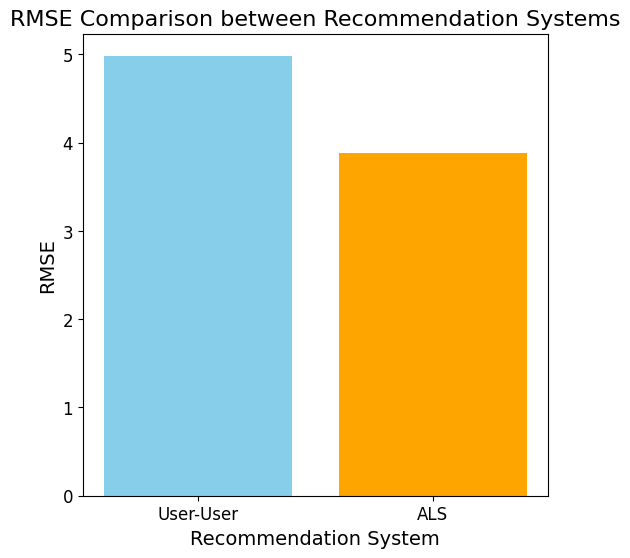

In [35]:
labels = ['User-User', 'ALS']
rmse_values = [UserUserrmse, ALSrmse]

plt.figure(figsize=(6, 6))
plt.bar(labels, rmse_values, color=['skyblue', 'orange'])
plt.xlabel('Recommendation System', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE Comparison between Recommendation Systems', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Results

The RMSE comparison reveals that the User-User Collaborative Filtering method achieved a better (lower) RMSE score compared to the ALS method in our dataset. This outcome is intriguing as ALS is generally more resilient to the scalability and sparsity issues that often challenge traditional collaborative filtering methods.


## Collaborative filtering challenges
### Memory consumption
One of the fundamental challenges in implementing Collaborative Filtering (CF), particularly the User-User method, is the computational and memory overhead associated with the user-item interaction matrix.
- **Core of algorithm**: This matrix forms the core of the Collaborative Filtering algorithm, capturing the relationships between users and items based on their interactions, such as ratings or views. However, its computation and storage pose significant challenges: 
    * Sparse Nature of the Matrix
    * Scalability Concerns

## Alternatives
### Sparse Matrix Representations
Utilizing data structures that efficiently represent sparse matrices can drastically reduce memory requirements. Libraries like SciPy in Python offer sparse matrix implementations that store only non-zero elements.
### Distributed Computing
Frameworks like Apache Spark allow for distributed computing, enabling the processing of large-scale data across multiple machines. This approach can mitigate memory constraints inherent to single-machine setups.

## Impact of Dataset Characteristics on Recommendation System Performance

When evaluating recommendation systems, particularly comparing **Collaborative Filtering (CF)** to **Alternating Least Squares (ALS)** through metrics like **RMSE (Root Mean Square Error)**, it's crucial to consider how dataset characteristics influence these metrics. A smaller or more uniform dataset can make CF appear more effective, potentially skewing comparison results.

### Dataset Size and Homogeneity

- **Smaller Datasets:** CF can perform exceptionally well on smaller, less diverse datasets because it can easily capture the prevalent user-item interaction patterns. This close fit results in a lower RMSE, indicating high accuracy. However, this might not translate to better performance on more diverse, real-world datasets.

- **Homogeneity:** If a dataset primarily consists of similar types of users or items, CF's ability to predict based on user-user similarities becomes more straightforward, enhancing its performance metrics.

### Skewness Towards Specific Ratings

- **Rating Concentration:** Many datasets exhibit a skewness towards certain ratings (e.g., users predominantly rating items they like). This concentration can lead to overfitting in CF, where the system becomes highly accurate for the dominant trends but less so for outlier preferences or less common interactions.

- **Impact on Variance:** A dataset skewed towards specific ratings types results in lower variance among user ratings. CF can exploit this to achieve lower RMSE by aligning closely with the average trend, which may not accurately reflect its ability to recommend items personalized to diverse user tastes.

### Comparison with ALS

- **Latent Factors in ALS:** Unlike CF, ALS aims to uncover latent factors that might not be immediately apparent from the user-item interactions. This approach is inherently suited for larger, more complex datasets, where the goal is to generalize well across a broad range of preferences.

- **Performance in Skewed Datasets:** In a skewed or smaller dataset, the complex model of ALS might not show a significant advantage over CF, as measured by RMSE. This doesn't necessarily indicate inferior performance but rather reflects ALS's design to capture deeper, more nuanced patterns that require larger datasets to manifest.

### Metric Interpretation

A lower RMSE for CF under certain dataset conditions highlights the need for careful consideration of dataset diversity, size, and rating distribution when comparing recommendation systems. It emphasizes that:

- **CF's Lower RMSE** might not always signify superior recommendation quality, especially in scenarios where dataset characteristics favor CF's mechanism.
- **ALS's Strengths** become more apparent in diverse and large-scale environments, where understanding complex user preferences is crucial.


## Conclusion

Our comparative analysis highlights the importance of considering dataset characteristics and algorithmic challenges when choosing a recommendation system. While User-User Collaborative Filtering performed better in terms of RMSE in this study, the ALS method's scalability and efficiency advantages make it a valuable alternative for larger-scale applications. Future investigations could explore parameter tuning for ALS and hybrid approaches to leverage the strengths of both methods.